# Homework 1

## Utilities

In [5]:
import networkx as nx
import random

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def degree_distribution(G):
    """computes the degree distribution of G"""

    degrees = [ G.degree[v] for v in G.nodes ]
    minimum, maximum = min(degrees), max(degrees)

    dist = np.zeros(maximum - minimum + 1)

    for d in degrees:
        dist[d - minimum] += 1

    return np.arange(minimum, maximum + 1), dist

def mean_degree(G):
    return sum(G.degree[v] for v in G.nodes)/G.number_of_nodes()

def plot_linear_and_log(x, y, log_xscale = 'linear'):
    fig, (ax, ax_log) = plt.subplots(1, 2, figsize=(20, 10))
    
    ax.plot(x, y)
    ax_log.plot(x, y)
    
    ax.set(
        xlabel='degree',
        ylabel='number of nodes',
        title ='linear'
    )

    ax_log.set(
        xlabel='degree',
        ylabel='number of nodes',
        yscale='log',
        xscale=log_xscale,
        title ='log'
    )

    ax.grid()
    ax_log.grid()

    plt.show()

## Exercise 1

As described in the exercise 1, given a undirected graph $G = (V, E)$ where $|V| = N$, and an edge $(u, v) \in E$, we want that the mean of the vertices degree be $4$. There is several ways to do this, but the more direct approach is to do this is to fix the probability $p$ of $(u,v)$ be an edge in $E$ to $4/N$.

mean degree:  3.9678


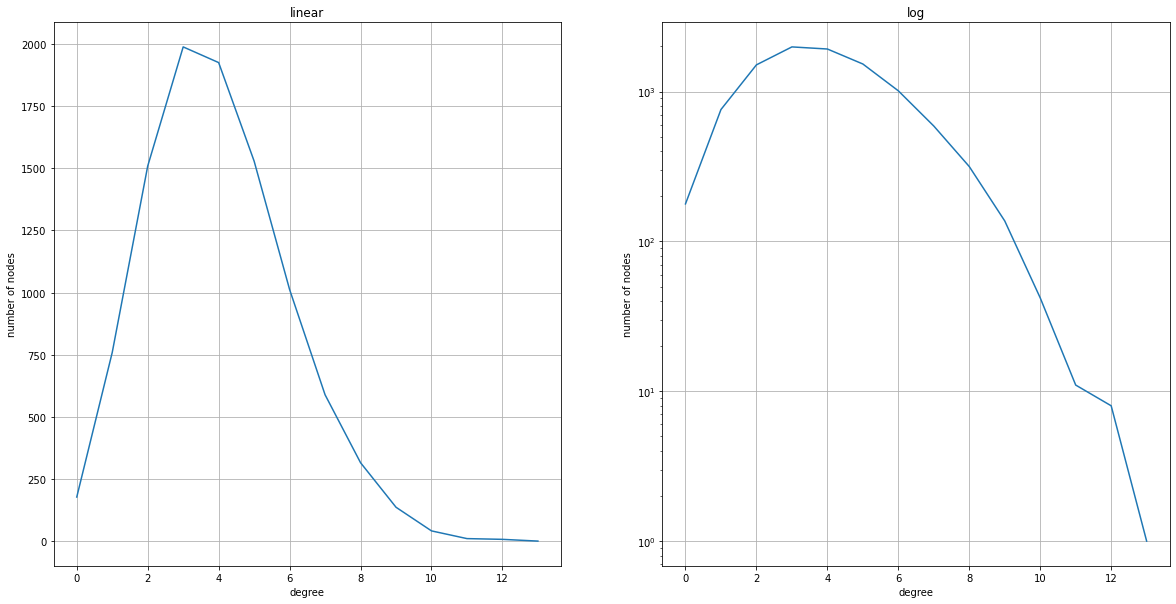

In [2]:
def build_graph(N):
    """
    build the graph for exercise 1
    """
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    prob = 4. / N

    for i in range(N):
        for j in range(i + 1, N):
            p = random.random()
            
            if p <= prob:
                G.add_edge(i, j)
    return G

def exercise_1():
    N = 10000

    G = build_graph(N)
    print('mean degree: ', mean_degree(G))
    
    x, y = degree_distribution(G)
    
    plot_linear_and_log(x, y)

exercise_1()

## Exercise 2

mean degree:  2.7118


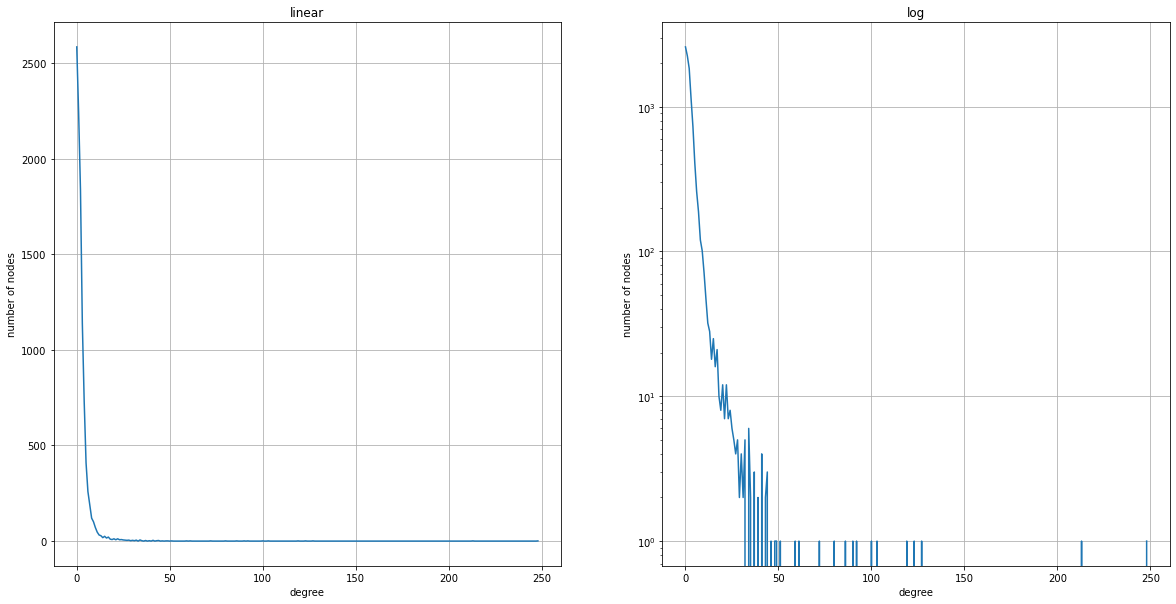

In [10]:
def calc_prob(G, s, i, j):
    epsilon = 0.00001
    q = 4./3.
    
    return ((G.degree[i] + epsilon) / (s + epsilon))*q

def build_graph(N):
    """
    build the graph for exercise 2
    """
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    for j in range(1, N):
        s = 2*G.number_of_edges()
        
        for i in range(j):
            prob = calc_prob(G, s, i, j)
            p = random.random()
            
            if p <= prob:
                G.add_edge(i, j)
    return G

def exercise_2():
    N = 10000
    
    G = build_graph(N)
    print('mean degree: ', mean_degree(G))
    
    x, y = degree_distribution(G)
    
    plot_linear_and_log(x, y)

exercise_2()